# Neural Network Project

## Data Description
Recognizing multi-digit numbers in photographs captured at street level is an important component of modernday map making. A classic example of a corpus of such street-level photographs is Google’s Street View
imagery comprised of hundreds of millions of geo-located 360-degree panoramic images. The ability to
automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed
number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building
it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical
character recognition community. While OCR on constrained domains like document processing is well
studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises
due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts,
colours, styles, orientations, and character arrangements. The recognition problem is further complicated by
environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred
around a single digit (many of the images do contain some distractors at the sides). Although we are taking a
sample of the data which is simpler, it is more complex than MNIST because of the distractors

## Dataset
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem
(recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google
Street View images

1. Importing data and understanding shape of train, test and validation data

In [1]:
import h5py

#Opening the file as read only
h5f = h5py.File('C:\\Users\\Srikanta\\Desktop\\Great Learning\\Python Files\\Week 30 Neural Networks Project\\SVHN_single_grey1.h5','r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [2]:
#Loading training, testing and validation datasets

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]


In [79]:
#Training data set
print('Shape of the dependent variable is', X_train.shape)
print('Shape of the independent variable is', y_train.shape)

Shape of the dependent variable is (42000, 1024)
Shape of the independent variable is (42000, 10)


In [80]:
#Testing data set
print('Shape of the dependent variable is', X_test.shape)
print('Shape of the independent variable is', y_test.shape)

Shape of the dependent variable is (18000, 1024)
Shape of the independent variable is (18000, 10)


In [82]:
#Validation data set
print('Shape of the dependent variable is', X_val.shape)
print('Shape of the independent variable is', y_val.shape)

Shape of the dependent variable is (60000, 1024)
Shape of the independent variable is (60000,)


TypeError: Invalid shape (1024,) for image data

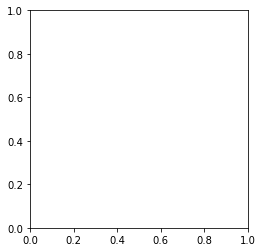

In [84]:
# Show first number in the training dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()
print('Label: ', X_train[0])

In [ ]:
# Show first number in the testing dataset
plt.imshow(X_test[0])
plt.show()
print('Label: ', y_test[0],)

2. Reshaping the data and normalizing

In [3]:
#Reshaping Images into a single row/vector for a fully connected layer

X_train = X_train.reshape(42000,1024)
print('Reshaped training dataset is',X_train.shape)

X_test = X_test.reshape(18000,1024)
print('Reshaped test dataset is',X_test.shape)


X_val = X_val.reshape(60000,1024)
print('Reshaped validation dataset is',X_val.shape)


Reshaped training dataset is (42000, 1024)
Reshaped test dataset is (18000, 1024)
Reshaped validation dataset is (60000, 1024)


In [4]:
#Normalizing data from 0 to 254.9745 to 0 to 1

X_train = X_train/X_train.max()
X_test = X_test/X_test.max()
X_val = X_val/X_val.max()

print(X_train.max())
print(X_train.min())
print(X_test.max())
print(X_test.min())
print(X_val.max())
print(X_val.min())

1.0
0.0
1.0
0.0
1.0
0.0


#### 3. One hot encoding labels

In [5]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [6]:
#Creating a one hot vector corresponding to the labels of train and test data
print(y_train[5])

y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test,num_classes=10)

print(y_train[5])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We notice above that the labels are converted to one hot vectors

#### 4. Model Architecture

In [21]:
#Container module
from keras.models import Sequential

#Fully connected layer
from keras.layers import Dense

#Regularizer to for L2 regularization
from keras.layers import Activation 

from keras.layers import Flatten

#Optimizer to train
from keras import optimizers
from keras import regularizers

from keras.layers import BatchNormalization, Dropout

In [22]:
iterations = 10
learning_rate = 0.01
hidden_nodes = 256
output_nodes = 10
    
model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(BatchNormalization())                  
model.add(Activation('relu'))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


adam = optimizers.adam(learning_rate = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
history = model.fit(X_train, y_train, batch_size = 2, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 61s 1ms/step - loss: 2.3247 - accuracy: 0.0976
Epoch 2/10
42000/42000 [==============================] - 61s 1ms/step - loss: 2.3047 - accuracy: 0.1004
Epoch 3/10
42000/42000 [==============================] - 63s 1ms/step - loss: 2.3033 - accuracy: 0.0982
Epoch 4/10
42000/42000 [==============================] - 58s 1ms/step - loss: 2.3032 - accuracy: 0.0989
Epoch 5/10
42000/42000 [==============================] - 58s 1ms/step - loss: 2.3032 - accuracy: 0.0975
Epoch 6/10
42000/42000 [==============================] - 59s 1ms/step - loss: 2.3031 - accuracy: 0.0989
Epoch 7/10
42000/42000 [==============================] - 57s 1ms/step - loss: 2.3033 - accuracy: 0.0992
Epoch 8/10
42000/42000 [==============================] - 56s 1ms/step - loss: 2.3031 - accuracy: 0.1012
Epoch 9/10
42000/42000 [==============================] - 59s 1ms/step - loss: 2.3031 - accuracy: 0.0998
Epoch 10/10
42000/42000 [==============================

Loss and accuracy seem to be in the correct range as there are 10 classes and the model is correctly predicting 1/10 = 0.1% accuracy

In [74]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(256, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [76]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 47s 1ms/step - loss: 1.7478 - accuracy: 0.3845 0s - loss: 1.7523 - accura
Epoch 2/100
42000/42000 [==============================] - 23s 546us/step - loss: 1.2490 - accuracy: 0.5963
Epoch 3/100
42000/42000 [==============================] - 23s 542us/step - loss: 1.0585 - accuracy: 0.6629
Epoch 4/100
42000/42000 [==============================] - 23s 547us/step - loss: 0.9646 - accuracy: 0.6966s - loss: 0.9667 - accuracy: 0. - ETA: 
Epoch 5/100
42000/42000 [==============================] - 23s 538us/step - loss: 0.8954 - accuracy: 0.7147
Epoch 6/100
42000/42000 [==============================] - 23s 542us/step - loss: 0.8411 - accuracy: 0.7340
Epoch 7/100
42000/42000 [==============================] - 23s 541us/step - loss: 0.7909 - accuracy: 0.7526
Epoch 8/100
42000/42000 [==============================] - 23s 541us/step - loss: 0.7434 - accuracy: 0.7669
Epoch 9/100
42000/42000 [==============================] - 23s 555us/ste

In [77]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 122us/step


In [87]:
print('Test loss: ', results[0])
print('Test accuracy: ', results[1])

Test loss:  0.6934842919376162
Test accuracy:  0.8260555267333984
